In [2]:
from halotools.empirical_models import abundance_matching
from halotools import sim_manager
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [3]:
#load halo catalogue
default_halocat = sim_manager.CachedHaloCatalog() 
halo_table = default_halocat.halo_table

In [10]:
#define schecter function
class Log_Schechter():
    
    def __init__(self, phi0, x0, alpha):
        self.phi0 = phi0
        self.x0 = x0
        self.alpha = alpha
    
    def __call__(self, x):
        x = np.asarray(x)
        x = x.astype(float)
        norm = np.log(10.0)*self.phi0
        val = norm*(10.0**((x-self.x0)*(1.0+self.alpha)))*np.exp(-10.0**(x-self.x0))
        return val

#define galaxy abundance function
dn_gal = Log_Schechter(10**(-3),10.5,-1.4)

#get tabulated form
mstar = np.linspace(8,12,100)
dn = dn_gal(mstar)

In [11]:
params = {'n': dn, 'x': mstar, 'type': 'differential'}
ab_func = abundance_matching.AbundanceFunctionFromTabulated(**params)

slice(-4, None, None)


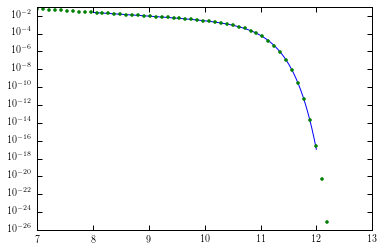

In [16]:
#plot galaxy abndance function
ext_mstar = np.linspace(7,12.2,50)
plt.figure()
plt.plot(mstar,dn)
plt.plot(ext_mstar,ab_func.dn(ext_mstar),'.')
plt.yscale('log')
plt.show()

In [20]:
SHAM_model = AbundanceMatching('mstar', 'halo_mvir', complete_subhalo_catalog = halo_table, scatter_level=0.0)

NameError: name 'AbundanceMatching' is not defined

In [5]:
#caclulate empirical halo abundnace
cumu_x, x_centers = abundance_matching.empirical_cum_ndensity(halo_table['halo_mvir'],default_halocat.Lbox**3)

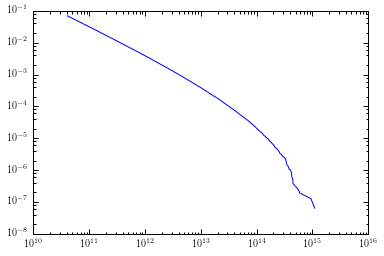

In [6]:
plt.figure()
plt.plot(x_centers,cumu_x)
plt.yscale('log')
plt.xscale('log')
plt.show()